Python script that reads an image from a file as grayscale, and finds the four non-overlapping 5x5 patches with highest average brightness. Take the patch centers as corners of a quadrilateral, calculate its area in pixels, and draw the quadrilateral in red into the image and save it in PNG format. Use the opencv-python package for image handling. 

In [440]:
#  immport libraries
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Original Image

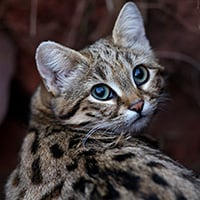

In [441]:
# Read input image
img = cv2.imread('/content/cat.jpg')
# Convert to Gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

Image after grey scale conversion

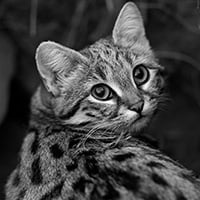

In [442]:
cv2_imshow(gray)

In [443]:

image_width = gray.shape[0]
image_height = gray.shape[1]
step_size = 5 # NxN neighborhood around each pixel
window_size = (5,5)  # Window Size

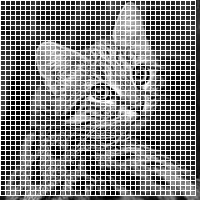

In [444]:
import matplotlib.pyplot as plt
count = 0
dict = {"window_id" : [],
        "window_avg_brightness" : []};
temp = 0
for x in range(0, image_height - window_size[0],step_size):
    for y in range(0, image_width - window_size[1],step_size):
      window = gray[x:x + window_size[0], y:y + window_size[1]]
      dict["window_id"].append([x,y])
      dict["window_avg_brightness"].append(window.mean())
      cv2.rectangle(gray, (x, y), (x + window_size[0], y + window_size[1]), (255, 0)) # draw rectangle grid on gray image
cv2_imshow(gray)

In [445]:
# Sort the grid values according to the highest average brightness
index = sorted(range(len(dict["window_avg_brightness"])), key=lambda i: dict["window_avg_brightness"][i], reverse=True)[:4]

In [446]:
# Extract grid information and store it to a list
list = []
for i in range(len(dict["window_avg_brightness"])):
    if i in index:
      list.append(dict["window_id"][i])

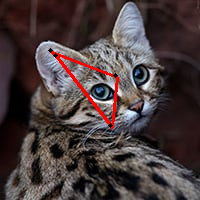

True

In [447]:
isClosed = True   # for closed polygon
color = (0, 0, 255)  # red color quadilateral
thickness = 2  # Line thickness of 2 px

#  polygon points 
pts = np.array([[[list[0][0]+step_size/2, list[0][1]+step_size/2], [list[1][0]+step_size/2, list[1][1]+step_size/2], [list[2][0]+step_size/2, list[2][1]+step_size/2], [list[3][0]+step_size/2, list[3][1]+step_size/2]]], np.int32)
image = cv2.polylines(img, [pts] , isClosed, color, thickness)

# Highlighted points
for i in list:
  cv2.circle(image, (i[0],i[1]), radius=0, color=(0, 0, 0), thickness=4)
cv2_imshow(image)  #  display output image with quadilateral

filename = '/content/output.png'  # Filename
cv2.imwrite(filename, img)  # Saving the image